In [1]:
import pandas as pd

# Read in data

In [2]:
file_3d_test = pd.read_parquet(
    "ccs-prediction/old_metlin_ccsbase_test_3d.parquet"
)
file_3d_train = pd.read_parquet(
    "ccs-prediction/old_metlin_ccsbase_train_3d.parquet"
)

In [3]:
test_data = pd.read_parquet(
    "ccs-prediction/combined_metlin_ccsbase_test.parquet"
)
train_data = pd.read_parquet(
    "ccs-prediction/combined_metlin_ccsbase_train.parquet"
)

In [4]:
file_3d_test.shape, test_data.shape

((12482, 14), (12491, 13))

In [5]:
file_3d_train.shape, train_data.shape

((60144, 14), (60144, 13))

# Replace ccs values for train data

In [6]:
# map ccs values from the train_data to the file_3d_train using smiles and adduct
file_3d_train = file_3d_train.merge(
    train_data[["smiles", "adduct", "ccs"]], on=["smiles", "adduct"]
)

<Axes: >

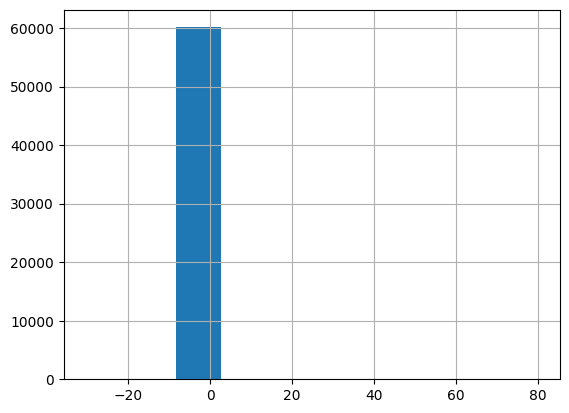

In [7]:
(file_3d_train["ccs_x"] - file_3d_train["ccs_y"]).hist()

In [8]:
file_3d_train.drop(columns=["ccs_x"], inplace=True)
file_3d_train.rename(columns={"ccs_y": "ccs"}, inplace=True)

In [9]:
file_3d_train.shape

(60144, 14)

In [10]:
file_3d_train.to_parquet(
    "ccs-prediction/metlin_ccsbase_train_3d.parquet"
)

# Replace ccs for test data

In [11]:
# map ccs values from the train_data to the file_3d using smiles and adduct
file_3d_test = file_3d_test.merge(
    test_data[["smiles", "adduct", "ccs"]], on=["smiles", "adduct"]
)

<Axes: >

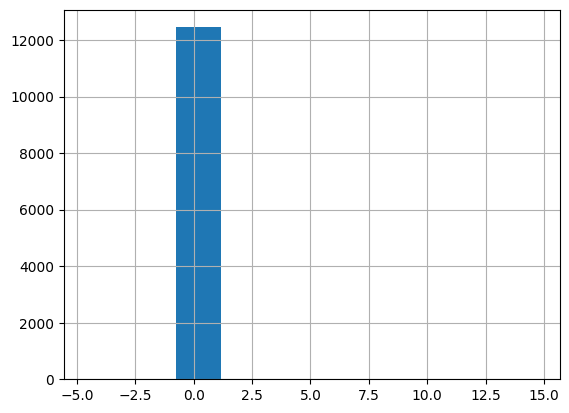

In [12]:
(file_3d_test["ccs_x"] - file_3d_test["ccs_y"]).hist()

In [13]:
file_3d_test.drop(columns=["ccs_x"], inplace=True)
file_3d_test.rename(columns={"ccs_y": "ccs"}, inplace=True)

In [14]:
file_3d_test.shape

(12482, 14)

In [15]:
file_3d_test.to_parquet(
    "ccs-prediction/metlin_ccsbase_test_3d.parquet"
)

In [16]:
file_3d = pd.concat([file_3d_train, file_3d_test])
file_3d.shape, file_3d.ccs.isna().sum()

((72626, 14), 0)

In [17]:
file_3d.to_parquet(
    "ccs-prediction/combined_metlin_ccsbase_train_test_split_3d.parquet"
)

# Get 3d ccs files

In [47]:
ccsbase_3d = pd.read_parquet(
    "ccs-prediction/ccsbase_3d.parquet"
)
ccsbase_3d_test = pd.read_parquet(
    "ccs-prediction/ccsbase_test_3d.parquet"
)
ccsbase_3d_train = pd.read_parquet(
    "ccs-prediction/ccsbase_train_3d.parquet"
)

In [49]:
ccsbase_3d.shape, ccsbase_3d_test.shape, ccsbase_3d_train.shape

((10771, 14), (1830, 14), (8941, 14))

In [50]:
ccsbase_3d_test = ccsbase_3d_test.merge(
    test_data[["smiles", "adduct", "ccs"]], on=["smiles", "adduct"]
)

<Axes: >

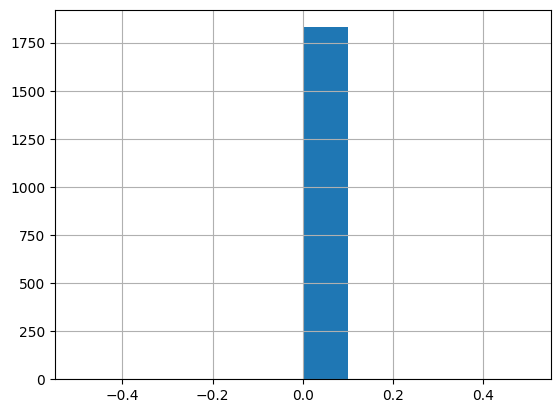

In [21]:
(ccsbase_3d_test["ccs_x"] - ccsbase_3d_test["ccs_y"]).hist()

In [22]:
ccsbase_3d_test.shape, ccsbase_3d_test.ccs_y.isna().sum()

((1830, 15), 0)

In [23]:
ccsbase_3d_test.drop(columns=["ccs_x"], inplace=True)
ccsbase_3d_test.rename(columns={"ccs_y": "ccs"}, inplace=True)
ccsbase_3d_test.to_parquet(
    "ccs-prediction/ccsbase_test_3d.parquet"
)

### ccsbase train

In [24]:
ccsbase_3d_train = ccsbase_3d_train.merge(
    train_data[["smiles", "adduct", "ccs"]], on=["smiles", "adduct"]
)

<Axes: >

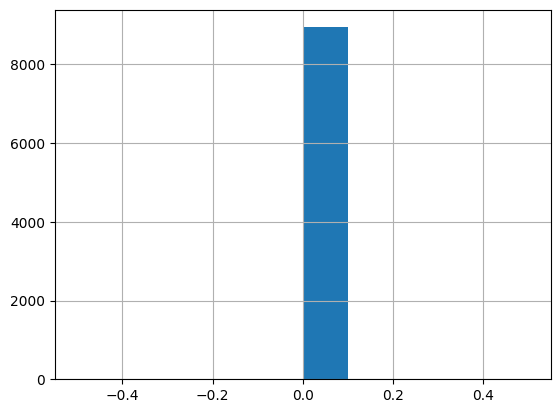

In [25]:
(ccsbase_3d_train["ccs_x"] - ccsbase_3d_train["ccs_y"]).hist()

In [26]:
ccsbase_3d_train.shape, ccsbase_3d_train.ccs_y.isna().sum()

((8941, 15), 0)

In [27]:
ccsbase_3d_train.drop(columns=["ccs_x"], inplace=True)
ccsbase_3d_train.rename(columns={"ccs_y": "ccs"}, inplace=True)
ccsbase_3d_train.to_parquet(
    "ccs-prediction/ccsbase_train_3d.parquet"
)

### whole dataset

In [28]:
new_ccsbase_3d = pd.concat([ccsbase_3d_train, ccsbase_3d_test])

(array([    0.,     0.,     0.,     0.,     0., 10771.,     0.,     0.,
            0.,     0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

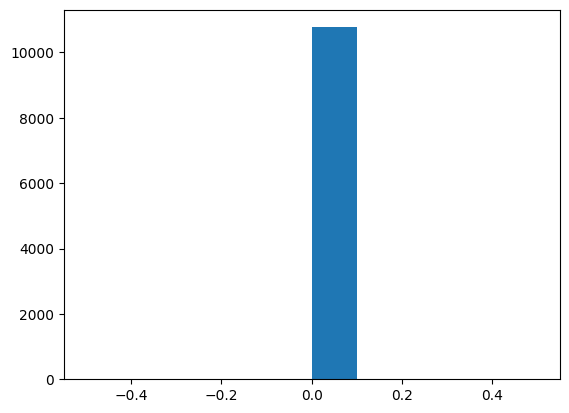

In [29]:
from matplotlib import pyplot as plt

plt.hist(
    ccsbase_3d.sort_values(["smiles", "adduct"])["ccs"].values
    - new_ccsbase_3d.sort_values(["smiles", "adduct"])["ccs"].values
)

In [30]:
new_ccsbase_3d.shape, new_ccsbase_3d.ccs.isna().sum()

((10771, 14), 0)

In [31]:
new_ccsbase_3d.to_parquet(
    "ccs-prediction/ccsbase_3d.parquet"
)

# Metlin

In [32]:
metlin_3d = pd.read_parquet(
    "ccs-prediction/metlin_3d.parquet"
)
metlin_3d_test = pd.read_parquet(
    "ccs-prediction/metlin_test_3d.parquet"
)
metlin_3d_train = pd.read_parquet(
    "ccs-prediction/metlin_train_3d.parquet"
)

In [33]:
metlin_3d.shape, metlin_3d_test.shape, metlin_3d_train.shape

((61855, 14), (10652, 14), (51203, 14))

In [34]:
metlin_3d_test = metlin_3d_test.merge(
    test_data[["smiles", "adduct", "ccs"]], on=["smiles", "adduct"]
)

In [35]:
metlin_3d_test.shape, metlin_3d_test.ccs_y.isna().sum()

((10652, 15), 0)

<Axes: >

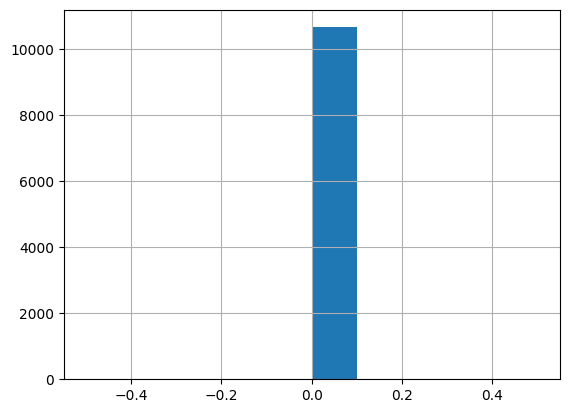

In [36]:
(metlin_3d_test["ccs_x"] - metlin_3d_test["ccs_y"]).hist()

In [37]:
metlin_3d_test.drop(columns=["ccs_x"], inplace=True)
metlin_3d_test.rename(columns={"ccs_y": "ccs"}, inplace=True)
metlin_3d_test.to_parquet(
    "ccs-prediction/metlin_test_3d.parquet"
)

### train

In [38]:
metlin_3d_train = metlin_3d_train.merge(
    train_data[["smiles", "adduct", "ccs"]], on=["smiles", "adduct"]
)

In [39]:
metlin_3d_train.shape, metlin_3d_train.ccs_y.isna().sum()

((51203, 15), 0)

<Axes: >

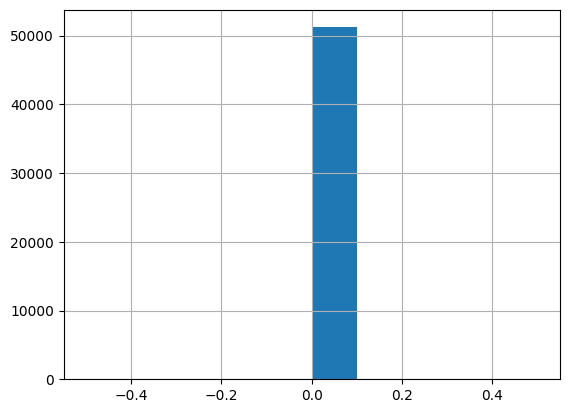

In [40]:
(metlin_3d_train["ccs_x"] - metlin_3d_train["ccs_y"]).hist()

In [41]:
metlin_3d_train.drop(columns=["ccs_x"], inplace=True)
metlin_3d_train.rename(columns={"ccs_y": "ccs"}, inplace=True)
metlin_3d_train.to_parquet(
    "ccs-prediction/metlin_train_3d.parquet"
)

# whole dataset

In [42]:
new_metlin_3d = pd.concat([metlin_3d_train, metlin_3d_test])

(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 9.0000e+00, 6.1837e+04, 1.0000e+00, 3.0000e+00]),
 array([-79.76 , -68.757, -57.754, -46.751, -35.748, -24.745, -13.742,
         -2.739,   8.264,  19.267,  30.27 ]),
 <BarContainer object of 10 artists>)

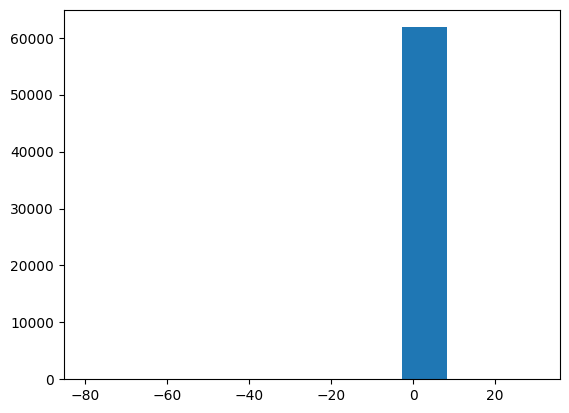

In [43]:
plt.hist(
    new_metlin_3d.sort_values(["smiles", "adduct"])["ccs"].values
    - metlin_3d.sort_values(["smiles", "adduct"])["ccs"].values
)

In [44]:
new_metlin_3d.shape, new_metlin_3d.ccs.isna().sum()

((61855, 14), 0)

In [45]:
new_metlin_3d.to_parquet(
    "ccs-prediction/metlin_3d.parquet"
)